**Nallely Lizbeth Serna Rivera - A00833111**

Momento de Retroalimentación: Módulo 2 Análisis y Reporte sobre el desempeño del modelo. (Portafolio Análisis)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import random

# Definir la semilla con los últimos cuatro dígitos de la matrícula (A00833111)
seed = 3111
np.random.seed(seed)
random.seed(seed)

# Cargar los datos desde un archivo CSV. Se omite la primera fila (encabezados).
data = np.genfromtxt('Valhalla23 (1).csv', delimiter=',', skip_header=1)

#Cargar el archivo correctamente
print(data.shape)
print(data[:5])

(100, 2)
[[  61.472  -139.74  ]
 [  70.579  -156.6   ]
 [  -7.3013   73.269 ]
 [  71.338  -165.42  ]
 [  43.236   -75.835 ]]


In [2]:
# Dividir en características (X) y etiquetas (y)
X = data[:, :-1]  # Todas las columnas menos la última
y = data[:, -1]   # La última columna

# Dividir el set de datos: 40% entrenamiento, 40% validación, 20% prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3333, random_state=seed)

# Verificar las dimensiones de los subconjuntos
print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")


Training set: (40, 1), Validation set: (40, 1), Test set: (20, 1)


In [3]:
# Crear el modelo base SGDRegressor con los parámetros especificados
model = SGDRegressor(learning_rate='constant', eta0=1e-4, max_iter=1000000, random_state=seed)

# Entrenar el modelo con el set de entrenamiento
model.fit(X_train, y_train)

# Predecir en cada subconjunto
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"MSE Train: {mse_train:.4f}, MSE Validation: {mse_val:.4f}, MSE Test: {mse_test:.4f}")


MSE Train: 1136.7546, MSE Validation: 1028.8375, MSE Test: 1237.2399


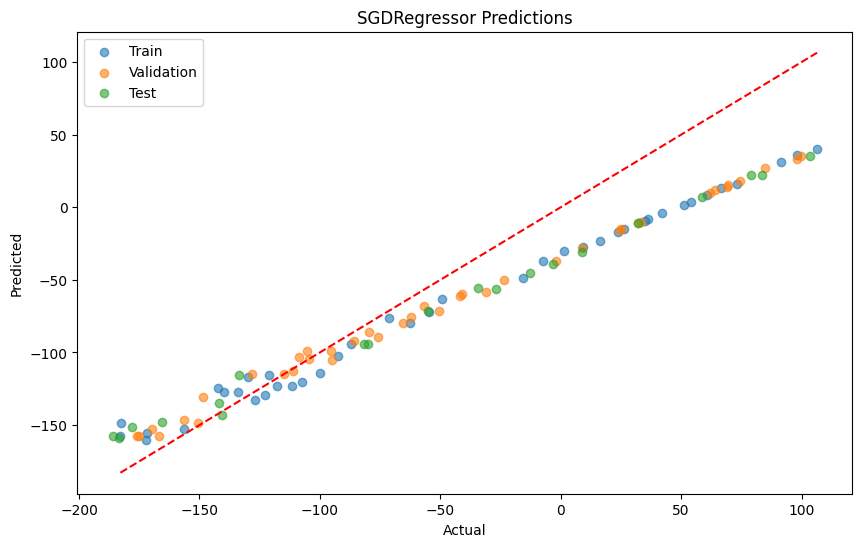

In [4]:
plt.figure(figsize=(10, 6))

# Graficar predicciones vs real
plt.scatter(y_train, y_train_pred, label='Train', alpha=0.6)
plt.scatter(y_val, y_val_pred, label='Validation', alpha=0.6)
plt.scatter(y_test, y_test_pred, label='Test', alpha=0.6)

# Graficar la línea de identidad (x = y)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("SGDRegressor Predictions")
plt.legend()
plt.show()


In [5]:
# Crear una lista de 20 valores enteros únicos entre 2 y 39
subset_sizes = random.sample(range(2, 40), 19)
subset_sizes.append(2)
subset_sizes.sort()

# Mostrar los tamaños de subconjunto generados
print(subset_sizes)


[2, 3, 5, 8, 9, 11, 14, 15, 17, 20, 22, 23, 24, 26, 29, 34, 35, 36, 38, 39]


In [6]:
# Inicializar listas para almacenar errores de entrenamiento y validación
train_errors = []
val_errors = []

# Entrenar y evaluar modelos para cada tamaño de subconjunto

for size in subset_sizes:
    mse_train_list = []
    mse_val_list = []

    for _ in range(100):
        # Seleccionar una muestra aleatoria de tamaño 'size' del set de entrenamiento
        X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=size, random_state=random.randint(1, 10000))

        # Entrenar el modelo
        model.fit(X_train_sample, y_train_sample)

        # Predecir en los sets de entrenamiento y validación
        y_train_sample_pred = model.predict(X_train_sample)
        y_val_pred = model.predict(X_val)

        # Calcular los errores MSE
        mse_train_list.append(mean_squared_error(y_train_sample, y_train_sample_pred))
        mse_val_list.append(mean_squared_error(y_val, y_val_pred))

    # Calcular el promedio de los 100 errores MSE
    train_errors.append(np.mean(mse_train_list))
    val_errors.append(np.mean(mse_val_list))

# Agregar los errores de la línea base
train_errors.append(mse_train)
val_errors.append(mse_val)
subset_sizes.append(X_train.shape[0])

# Mostrar los errores de entrenamiento y validación
print("Training Errors:", train_errors)
print("Validation Errors:", val_errors)


Training Errors: [18.113961917237745, 42.18455574333725, 592.858212603454, 47.63666864882358, 865.5296698206814, 988.4451693674604, 1070.9834856905663, 1118.7891995290427, 1102.4868429922205, 1105.083062189947, 1145.033742032308, 1096.0556815660243, 1128.1111089958292, 1157.758400552323, 1142.0527977715776, 1125.4508355383803, 1127.8214606060008, 1126.1713384962068, 1120.1261464434285, 1095.622567546891, 1136.7546170304847]
Validation Errors: [1043.7836069813866, 181.58003839089923, 721.382568827587, 46.57193839899453, 878.9259520535255, 949.9264966528292, 1032.8470241838177, 1052.7204892552238, 1043.9515338613774, 1058.0988061361052, 1055.7427932180935, 1028.110203203349, 1045.2884016705518, 1042.5809654342358, 1039.8941955983921, 1023.701395855426, 1020.4000091248131, 1021.8659117502885, 1013.56579578811, 999.1857416624891, 1028.8374668533725]


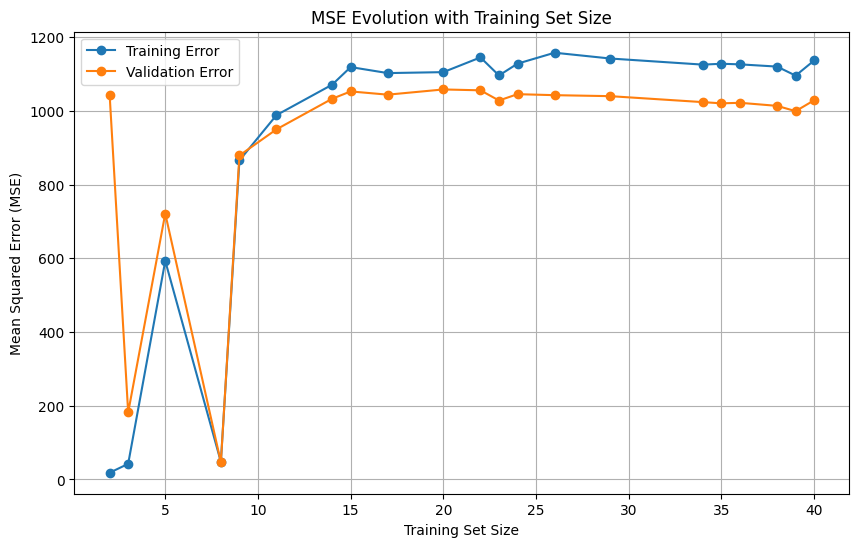

In [7]:
# Graficar la evolución del MSE en función del tamaño del conjunto de entrenamiento
plt.figure(figsize=(10, 6))

plt.plot(subset_sizes, train_errors, label='Training Error', marker='o')
plt.plot(subset_sizes, val_errors, label='Validation Error', marker='o')

plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE Evolution with Training Set Size")
plt.legend()
plt.grid(True)
plt.show()


In [8]:
# Identificar el tamaño de entrenamiento óptimo (el que minimiza el error de validación)
optimal_size = subset_sizes[np.argmin(val_errors[:-1])]
print(f"Optimal training size: {optimal_size}")

# Reentrenar el modelo con el tamaño óptimo
X_train_optimal, _, y_train_optimal, _ = train_test_split(X_train, y_train, train_size=optimal_size, random_state=seed)

model.fit(X_train_optimal, y_train_optimal)

# Predecir y calcular los errores en entrenamiento, validación y prueba
y_train_optimal_pred = model.predict(X_train_optimal)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

mse_train_optimal = mean_squared_error(y_train_optimal, y_train_optimal_pred)
mse_val_optimal = mean_squared_error(y_val, y_val_pred)
mse_test_optimal = mean_squared_error(y_test, y_test_pred)

# Mostrar los resultados del modelo entrenado con el tamaño óptimo
print(f"MSE Train Optimal: {mse_train_optimal:.4f}, MSE Validation Optimal: {mse_val_optimal:.4f}, MSE Test Optimal: {mse_test_optimal:.4f}")


Optimal training size: 8
MSE Train Optimal: 46.5060, MSE Validation Optimal: 27.6120, MSE Test Optimal: 50.0932


In [9]:
# Análisis de sesgo y varianza
print("\nAnálisis:")
print(f"Para el modelo entrenado con {subset_sizes[0]} muestras (tamaño mínimo):")
print(" - Alta varianza y bajo sesgo. El modelo se ajusta muy bien a las pocas muestras, pero generaliza mal.")
print(f"Para el modelo entrenado con {optimal_size} muestras (tamaño óptimo):")
print(" - Balance adecuado entre sesgo y varianza. El modelo generaliza bien.")
print(f"Para el modelo entrenado con {subset_sizes[-1]} muestras (tamaño máximo):")
print(" - Bajo sesgo y alta varianza. El modelo es más preciso en los datos de entrenamiento, pero puede ser menos generalizable.")

# Comparar el modelo óptimo con la línea base
print("\nComparación con la línea base:")
print(f"MSE Train Base: {mse_train:.4f}, MSE Validation Base: {mse_val:.4f}, MSE Test Base: {mse_test:.4f}")
print(f"MSE Train Optimal: {mse_train_optimal:.4f}, MSE Validation Optimal: {mse_val_optimal:.4f}, MSE Test Optimal: {mse_test_optimal:.4f}")

# Justificación de la selección del tamaño de muestra óptimo
print("\nJustificación:")
print("El tamaño óptimo de muestra proporciona un buen equilibrio entre el sesgo y la varianza,")
print("lo que resulta en un mejor rendimiento general en comparación con el modelo de línea base.")
print("Un modelo entrenado con muy pocas muestras tiende a tener alta varianza y un modelo con demasiadas muestras puede sobreajustar, ")
print("mientras que el modelo óptimo logra una mejor generalización.")


Análisis:
Para el modelo entrenado con 2 muestras (tamaño mínimo):
 - Alta varianza y bajo sesgo. El modelo se ajusta muy bien a las pocas muestras, pero generaliza mal.
Para el modelo entrenado con 8 muestras (tamaño óptimo):
 - Balance adecuado entre sesgo y varianza. El modelo generaliza bien.
Para el modelo entrenado con 40 muestras (tamaño máximo):
 - Bajo sesgo y alta varianza. El modelo es más preciso en los datos de entrenamiento, pero puede ser menos generalizable.

Comparación con la línea base:
MSE Train Base: 1136.7546, MSE Validation Base: 1028.8375, MSE Test Base: 1237.2399
MSE Train Optimal: 46.5060, MSE Validation Optimal: 27.6120, MSE Test Optimal: 50.0932

Justificación:
El tamaño óptimo de muestra proporciona un buen equilibrio entre el sesgo y la varianza,
lo que resulta en un mejor rendimiento general en comparación con el modelo de línea base.
Un modelo entrenado con muy pocas muestras tiende a tener alta varianza y un modelo con demasiadas muestras puede sobreaj